In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from datetime import datetime
from datetime import timedelta

pd.set_option('display.max_columns',None)
data = pd.read_csv('/mnt/NFS_SQUAD_HISTO/OCI_DATA/02_intermediate/preprocessed_oss_counter_all_v3_new.csv',delimiter ='|')
data = data.sort_values(by=['week_period'])
data = data.drop('Unnamed: 0', axis =1)
def process_cell_name(cell):
    return cell.replace("_dismantled","")
data['processed_cell_name'] = data.cell_name.apply(process_cell_name)
to_delete = data[data.duplicated(subset=['processed_cell_name','date'])].sort_values(['date','processed_cell_name'])
cleaned_data = data.drop(to_delete.index)

In [6]:
data = cleaned_data.drop([# ids
                          'index','year','week','week_period','processed_cell_name',
                          # empty
                          'average_number_of_users_dl','average_number_of_users_ul',
                          'cell_occupation_ul_percentage',
                          # highly correlated 
                          'lost_traffic_kerlands',
                          'total_data_traffic_ul_gb'],axis=1)
data

,cell_name,date,cell_band,cell_tech,cell_sector,site_id,total_data_traffic_dl_gb,total_voice_traffic_kerlands,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,cell_occupation_dl_percentage,traffic_loss_rate,average_number_of_users_in_queue
2357262,OCI1528_DED_L26-1,2020-02-10,L26,4G,1,OCI1528,195.104622,0.00,NaN,NaN,17.16,NaN,NaN
1400808,OCI0274_CAMPEMENT_G18-1,2020-02-10,G18,2G,1,OCI0274,2.877000,2916.24,39.04,22.08,27.04,NaN,NaN
1995627,OCI1014_SOROBANGO_U9-3,2020-02-10,U9,3G,3,OCI1014,26.250000,64.88,4504.88,401.00,81.87,NaN,NaN
2470972,OCI1715_HOTEL_IVOIRE_PALMIER_L26-1,2020-02-10,L26,4G,1,OCI1715,138.929640,0.00,NaN,NaN,15.91,NaN,NaN
1400858,OCI0274_CAMPEMENT_G18-2,2020-02-10,G18,2G,2,OCI0274,7.017000,2619.66,35.27,21.67,30.19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132188,OCI0307_CNTIG_U21-22,2021-07-19,U21,3G,2,OCI0307,0.000000,0.00,NaN,NaN,NaN,0.0,1.0
905754,OCI2275_MAHINO_U9-2,2021-07-19,U9,3G,2,OCI2275,0.000000,0.00,NaN,NaN,NaN,0.0,2.0
832027,OCI2124_BABA_U9-2,2021-07-19,U9,3G,2,OCI2124,0.000000,0.00,NaN,NaN,NaN,0.0,1.0
564354,OCI1410_ADJAME_MOSQUEE_U21-22,2021-07-19,U21,3G,2,OCI1410,0.000000,0.00,NaN,NaN,NaN,0.0,1.0


In [7]:
dummed_data = pd.get_dummies(data,columns=['cell_band','cell_tech','cell_sector'])
dummed_data

,cell_name,date,site_id,total_data_traffic_dl_gb,total_voice_traffic_kerlands,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,cell_occupation_dl_percentage,traffic_loss_rate,average_number_of_users_in_queue,cell_band_G18,cell_band_G9,cell_band_L18,cell_band_L23,cell_band_L26,cell_band_L8,cell_band_U21,cell_band_U9,cell_tech_2G,cell_tech_3G,cell_tech_4G,cell_sector_1,cell_sector_2,cell_sector_3,cell_sector_4
2357262,OCI1528_DED_L26-1,2020-02-10,OCI1528,195.104622,0.00,NaN,NaN,17.16,NaN,NaN,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1400808,OCI0274_CAMPEMENT_G18-1,2020-02-10,OCI0274,2.877000,2916.24,39.04,22.08,27.04,NaN,NaN,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1995627,OCI1014_SOROBANGO_U9-3,2020-02-10,OCI1014,26.250000,64.88,4504.88,401.00,81.87,NaN,NaN,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
2470972,OCI1715_HOTEL_IVOIRE_PALMIER_L26-1,2020-02-10,OCI1715,138.929640,0.00,NaN,NaN,15.91,NaN,NaN,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1400858,OCI0274_CAMPEMENT_G18-2,2020-02-10,OCI0274,7.017000,2619.66,35.27,21.67,30.19,NaN,NaN,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132188,OCI0307_CNTIG_U21-22,2021-07-19,OCI0307,0.000000,0.00,NaN,NaN,NaN,0.0,1.0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
905754,OCI2275_MAHINO_U9-2,2021-07-19,OCI2275,0.000000,0.00,NaN,NaN,NaN,0.0,2.0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
832027,OCI2124_BABA_U9-2,2021-07-19,OCI2124,0.000000,0.00,NaN,NaN,NaN,0.0,1.0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
564354,OCI1410_ADJAME_MOSQUEE_U21-22,2021-07-19,OCI1410,0.000000,0.00,NaN,NaN,NaN,0.0,1.0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [8]:
data_per_site = dummed_data.groupby(['site_id','date'],as_index=False)\
                            .agg({'cell_name':'nunique',
                                'total_data_traffic_dl_gb':'sum',
                                'total_voice_traffic_kerlands':'sum',
                                'average_throughput_user_dl_kbps':'mean',
                                'average_throughput_user_ul_kbps':'mean',
                                'cell_occupation_dl_percentage':'mean',
                                'traffic_loss_rate':'mean',
                                'average_number_of_users_in_queue':'mean',
                                'cell_band_G18':'mean',
                                'cell_band_G9':'mean',
                                'cell_band_L18':'mean',
                                'cell_band_L23':'mean',
                                'cell_band_L26':'mean',
                                'cell_band_L8':'mean',
                                'cell_band_U21':'mean',
                                'cell_band_U9':'mean',
                                'cell_tech_2G':'mean',
                                'cell_tech_3G':'mean',
                                'cell_tech_4G':'mean',
                                'cell_sector_1':'mean',
                                'cell_sector_2':'mean',
                                'cell_sector_3':'mean',
                                'cell_sector_4':'mean'})
data_per_site

,site_id,date,cell_name,total_data_traffic_dl_gb,total_voice_traffic_kerlands,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,cell_occupation_dl_percentage,traffic_loss_rate,average_number_of_users_in_queue,cell_band_G18,cell_band_G9,cell_band_L18,cell_band_L23,cell_band_L26,cell_band_L8,cell_band_U21,cell_band_U9,cell_tech_2G,cell_tech_3G,cell_tech_4G,cell_sector_1,cell_sector_2,cell_sector_3,cell_sector_4
0,OCI0001,2020-02-10,21,2170.797442,16437.77,1208.443333,139.445000,67.411905,NaN,NaN,0.142857,0.142857,0.0,0.0,0.0,0.142857,0.428571,0.142857,0.285714,0.571429,0.142857,0.333333,0.333333,0.333333,0.0
1,OCI0001,2020-02-17,21,2188.379873,16922.50,1193.445556,134.071111,67.805238,NaN,NaN,0.142857,0.142857,0.0,0.0,0.0,0.142857,0.428571,0.142857,0.285714,0.571429,0.142857,0.333333,0.333333,0.333333,0.0
2,OCI0001,2020-02-24,21,2092.959974,16492.88,1775.892857,330.532857,67.258571,0.047619,2.233333,0.142857,0.142857,0.0,0.0,0.0,0.142857,0.428571,0.142857,0.285714,0.571429,0.142857,0.333333,0.333333,0.333333,0.0
3,OCI0001,2020-03-02,21,2263.563901,17638.44,1707.894286,353.967143,68.397143,0.034392,2.435333,0.142857,0.142857,0.0,0.0,0.0,0.142857,0.428571,0.142857,0.285714,0.571429,0.142857,0.333333,0.333333,0.333333,0.0
4,OCI0001,2020-03-09,21,2352.227472,17900.44,1671.476667,323.338095,68.928571,0.047619,2.784000,0.142857,0.142857,0.0,0.0,0.0,0.142857,0.428571,0.142857,0.285714,0.571429,0.142857,0.333333,0.333333,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204753,SMALL,2021-06-21,2,0.000000,0.00,NaN,NaN,38.865000,0.000000,NaN,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0
204754,SMALL,2021-06-28,2,1.220000,15.88,3842.630000,975.000000,75.645000,0.000000,NaN,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0
204755,SMALL,2021-07-05,2,0.000000,0.00,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0
204756,SMALL,2021-07-12,2,0.000000,0.00,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0


In [9]:
scaler = MinMaxScaler()
cols = data_per_site.drop(['site_id','date'],axis=1).columns
df_scaled = data_per_site.copy()
for col in cols :
    df_scaled[[col]] = scaler.fit_transform(data_per_site[[col]])
df_scaled
df_final = df_scaled.interpolate()
df_final

,site_id,date,cell_name,total_data_traffic_dl_gb,total_voice_traffic_kerlands,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,cell_occupation_dl_percentage,traffic_loss_rate,average_number_of_users_in_queue,cell_band_G18,cell_band_G9,cell_band_L18,cell_band_L23,cell_band_L26,cell_band_L8,cell_band_U21,cell_band_U9,cell_tech_2G,cell_tech_3G,cell_tech_4G,cell_sector_1,cell_sector_2,cell_sector_3,cell_sector_4
0,OCI0001,2020-02-10,0.333333,0.197793,0.344327,0.008818,0.005113,0.747710,NaN,NaN,0.142857,0.142857,0.0,0.0,0.0,0.142857,0.428571,0.142857,0.285714,0.571429,0.142857,0.333333,0.333333,0.666667,0.0
1,OCI0001,2020-02-17,0.333333,0.199395,0.354481,0.008709,0.004916,0.752073,NaN,NaN,0.142857,0.142857,0.0,0.0,0.0,0.142857,0.428571,0.142857,0.285714,0.571429,0.142857,0.333333,0.333333,0.666667,0.0
2,OCI0001,2020-02-24,0.333333,0.190701,0.345481,0.012959,0.012120,0.746010,0.998866,0.083750,0.142857,0.142857,0.0,0.0,0.0,0.142857,0.428571,0.142857,0.285714,0.571429,0.142857,0.333333,0.333333,0.666667,0.0
3,OCI0001,2020-03-02,0.333333,0.206245,0.369478,0.012462,0.012980,0.758638,0.998860,0.091325,0.142857,0.142857,0.0,0.0,0.0,0.142857,0.428571,0.142857,0.285714,0.571429,0.142857,0.333333,0.333333,0.666667,0.0
4,OCI0001,2020-03-09,0.333333,0.214324,0.374966,0.012197,0.011857,0.764533,0.998866,0.104400,0.142857,0.142857,0.0,0.0,0.0,0.142857,0.428571,0.142857,0.285714,0.571429,0.142857,0.333333,0.333333,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204753,SMALL,2021-06-21,0.016667,0.000000,0.000000,0.026680,0.031880,0.431078,0.998846,0.037500,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0
204754,SMALL,2021-06-28,0.016667,0.000111,0.000333,0.028040,0.035752,0.839029,0.998846,0.037500,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0
204755,SMALL,2021-07-05,0.016667,0.000000,0.000000,0.028040,0.035752,0.839029,0.998846,0.037500,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0
204756,SMALL,2021-07-12,0.016667,0.000000,0.000000,0.028040,0.035752,0.839029,0.998846,0.037500,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0


In [10]:
def feature_fft(feature_name, site_name,x_min,x_max,y_min,y_max, peaks_number):
    fig, axs = plt.subplots(2,2,figsize=(15,10))
    sample = df_final[df_final.site_id == site_name].sort_values("date")[:-1]
    prev = datetime.strptime(list(sample.date)[0],'%Y-%m-%d')
    for x in sample[['date',feature_name]].date[1:]:
        actual = datetime.strptime(x,'%Y-%m-%d')
        if((actual - prev) != timedelta(days=7)):
            print(actual,actual - prev)
            return
        prev = actual
        
    sample[['date',feature_name]].plot(x='date',ax=axs[0][0])
    hann = np.hanning(len(sample))
    windowed_sample = sample.copy()
    windowed_sample[feature_name] = windowed_sample[feature_name]*hann
    windowed_sample[['date',feature_name]].plot(x='date',ax = axs[0][1])
    yhann = np.fft.fft(windowed_sample[feature_name])
    n = int(len(yhann)/2+1)
    x = np.linspace(0,.5*1/1,n,endpoint=True)
    y = 2*np.abs(yhann[:n]/n)
    axs[1][0].plot(x,y)
    
    xps = (1/x)
    axs[1][1].plot(xps,y)
    
    axs[0][0].set_title('{} through time'.format(feature_name))
    axs[0][1].set_title('Hanning windowing')
    axs[1][0].set_title('Frequency distribution')
    axs[1][1].set_title('Period distribution')
    
    axs[1][0].set_xlabel('Frequency (1/week)')
    axs[1][1].set_xlabel('Period distribution (weeks)')
    
    axs[1][1].set_xlim(x_min,x_max)
    axs[1][1].set_ylim(y_min,y_max)
    
    y_max = sorted(y,reverse=True)[1:peaks_number]
    x_of_y_max = [xps[list(y).index(y_max_i)] for y_max_i in y_max]
    return y_max, x_of_y_max
        

In [13]:
from random import sample
site_id = sample(list(data.site_id),1)[0]
site_id

'OCI1678'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


([0.027624255178775352,
  0.0033575129063108068,
  0.003209218465074477,
  0.0023920522986214257,
  0.001705120556831962,
  0.0016473081074610272,
  0.0014199435064903188,
  0.0013587524707459075,
  0.0013460667007000125],
 [74.0,
  37.0,
  24.666666666666664,
  18.5,
  9.25,
  10.571428571428571,
  8.222222222222221,
  14.799999999999999,
  4.352941176470588])

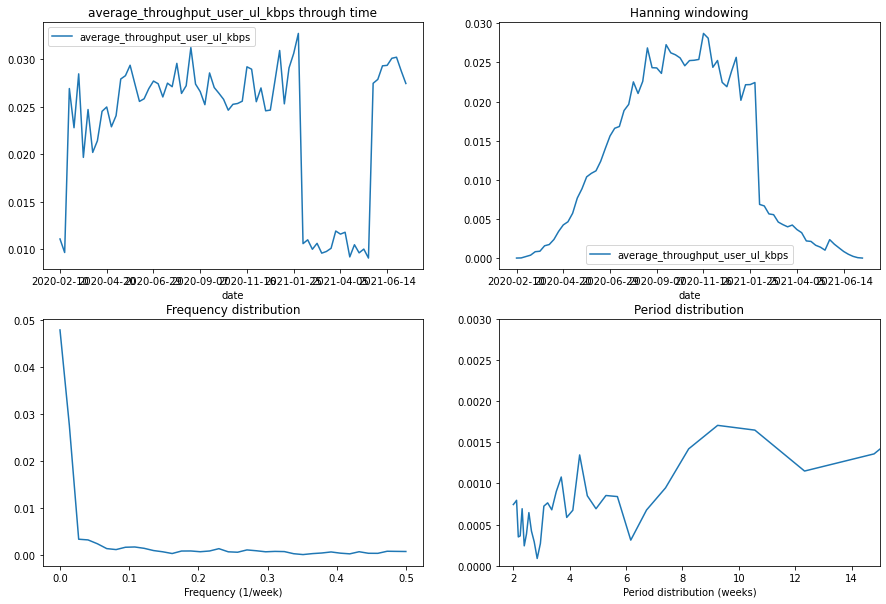

In [16]:
feature_fft('average_throughput_user_ul_kbps',site_id,1.5,15,0,.003,10)